# MNIST - Categorical Classification
> # L2 Regularization


In [1]:
import warnings
warnings.filterwarnings('ignore')

# I. MNIST Data_Set Load

In [2]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


# II. Data Preprocessing

> ## 1) Normalization and Reshape

* Normalization

In [3]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

* reshape

In [4]:
X_train = X_train.reshape((60000, 28 * 28))
X_test = X_test.reshape((10000, 28 * 28))

> ## 2) One Hot Encoding

In [5]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

> ## 3) train_test_split( )

* Train(48,000) vs. Validation(12,000)

In [6]:
from sklearn.model_selection import train_test_split 

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                      test_size = 0.2,
                                                      random_state = 2045)

# III. MNIST Keras Modeling

> ## 1) Model Define

* 모델 신경망 구조 정의
 - 2개의 Hidden Layers & 768개의 Nodes
 - Model Capacity는 기존과 동일
 - L2 Regularization 적용

In [7]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

mnist = models.Sequential()
mnist.add(layers.Dense(512, activation = 'relu',
                       kernel_regularizer = regularizers.l2(0.00005),
                       input_shape=(28 * 28,)))
mnist.add(layers.Dense(256, activation = 'relu',
                       kernel_regularizer = regularizers.l2(0.00005)))
mnist.add(layers.Dense(10, activation = 'softmax'))

* 모델 구조 확인

In [8]:
mnist.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


> ## 2) Model Compile

* 모델 학습방법 설정

In [9]:
mnist.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

> ## 3) Model Fit

* 약 4분

In [10]:
%%time

Hist_mnist = mnist.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/100
375/375 [==============================] - 9s 7ms/step - loss: 0.3170 - accuracy: 0.9199 - val_loss: 0.1842 - val_accuracy: 0.9617
Epoch 2/100
375/375 [==============================] - 2s 6ms/step - loss: 0.1471 - accuracy: 0.9701 - val_loss: 0.1508 - val_accuracy: 0.9705
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 0.1118 - accuracy: 0.9806 - val_loss: 0.1363 - val_accuracy: 0.9748
Epoch 4/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0926 - accuracy: 0.9857 - val_loss: 0.1295 - val_accuracy: 0.9757
Epoch 5/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0781 - accuracy: 0.9889 - val_loss: 0.1217 - val_accuracy: 0.9786
Epoch 6/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0707 - accuracy: 0.9910 - val_loss: 0.1256 - val_accuracy: 0.9758
Epoch 7/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0619 - accuracy: 0.9929 - val_loss: 0.1308 - val_accuracy: 0.9767

> ## 4) 학습 결과 시각화

* Loss Visualization

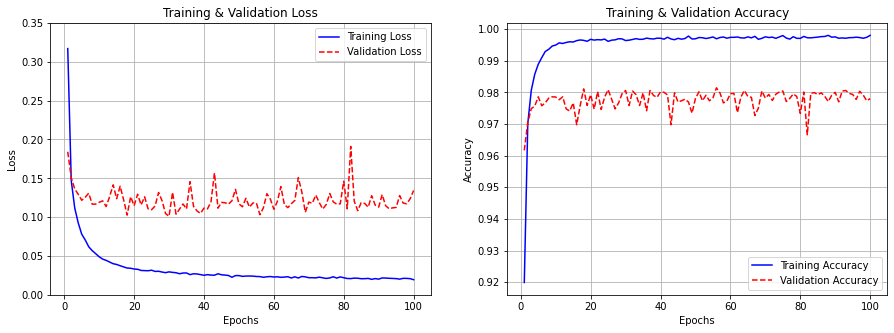

In [11]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_mnist.history['loss'], 'b-')
plt.plot(epochs, Hist_mnist.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 0.35)
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_mnist.history['accuracy'], 'b-')
plt.plot(epochs, Hist_mnist.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

> ## 5) Model Evaluate

* Loss & Accuracy

In [12]:
loss, accuracy = mnist.evaluate(X_test, y_test, verbose = 0)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 0.11591
Accuracy = 0.97770


# 
# 
# 
# The End
# 
# 
# 